<a href="https://colab.research.google.com/github/ashishbhatta/Assignment-2/blob/main/Question%201/jupyter_notebook/Load%20Flow%20Model%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import time
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import tree
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold, GridSearchCV #for hyper parameter Tuning
from sklearn.multioutput import MultiOutputRegressor

import math


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split #needed for spliting data into testing and training
from sklearn.preprocessing import StandardScaler
#from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error #For calculating MSE

## Defining Functions

In [3]:
def extract_input_output(df):
    data=np.array(df)
    X=data[:,1:19]
    y=data[:,19:28]
    return X,y


In [4]:
def plot_input_output(X,y):
    for i in range(9):
        fig1 = plt.figure()
        plt.scatter(X[:, i], y[:, i])
        plt.xlabel('Active Power (kW)')
        plt.ylabel('Bus Voltage (pu)')
        plt.title(f'Active Power vs Bus {i+1}')
        plt.show()  # Display the first plot

        fig2 = plt.figure()
        plt.scatter(X[:, i+9], y[:, i],color='orange')
        plt.xlabel('Reactive Power (kVaR)')
        plt.ylabel('Bus Voltage (pu)')
        plt.title(f'Reactive Power vs Bus {i+1}')
        plt.show()  # Display the first plot


In [5]:
def extract_test_train(inputs, outputs, testsize=0.2):
    X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, random_state=42, test_size=testsize)
    return X_train, X_test, y_train, y_test

In [6]:
def normalize_inputs(X_train,X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled,X_test_scaled

In [7]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Training Time
    start_time_train = time.process_time()
    model.fit(X_train, y_train)
    training_time = time.process_time() - start_time_train
    print(f"Training Time: {training_time:.5f} seconds")

    # Training MSE and RMSE
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = math.sqrt(mse_train)
    print(f"Training MSE: {mse_train:.5f}")
    print(f"Training RMSE: {rmse_train:.5f}")

    # Training MAPE
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    print(f"Training MAPE: {mape_train:.5f}%")

    # Testing Time
    start_time_test = time.process_time()
    y_test_pred = model.predict(X_test)
    testing_time = time.process_time() - start_time_test
    print(f"Testing Time: {testing_time:.5f} seconds")

    # Testing RMSE
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = math.sqrt(mse_test)
    print(f"Testing RMSE: {rmse_test:.5f}")

    # Testing MAPE
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    print(f"Testing MAPE: {mape_test:.5f}%")

    # Display Actual vs Predicted values (optional)
    print("\nActual Values:")
    print(y_test)
    print("Predicted Values:")
    print(y_test_pred)

    # Plotting for each target
    num_targets = y_test.shape[1]  # Number of targets (columns)
    for i in range(num_targets):
        plt.figure(i)
        plt.scatter(y_test[:, i], y_test_pred[:, i], color='blue', label=f'Target {i+1} Predicted vs Actual')
        plt.plot([min(y_test[:, i]), max(y_test[:, i])], [min(y_test[:, i]), max(y_test[:, i])], color='red', linestyle='--')  # Ideal line
        plt.xlabel(f'Actual Values (Target {i+1})')
        plt.ylabel(f'Predicted Values (Target {i+1})')
        plt.title(f'Predicted vs Actual Values (Target {i+1})')
        plt.legend()
        plt.show()


## Main Code

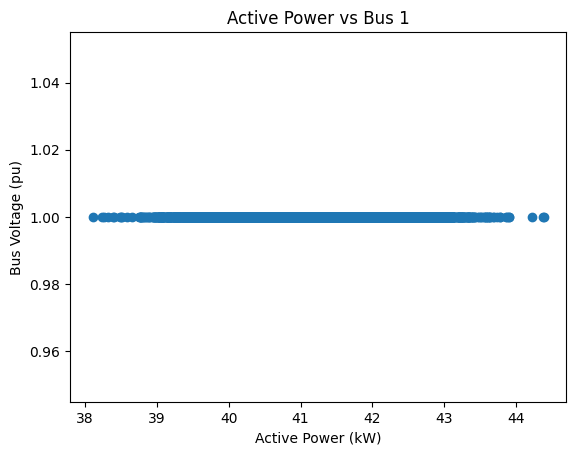

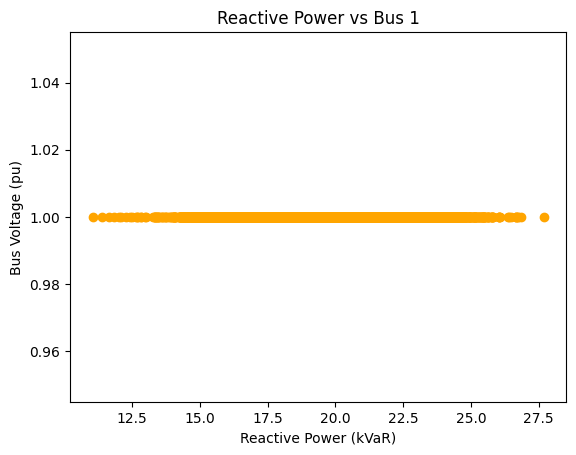

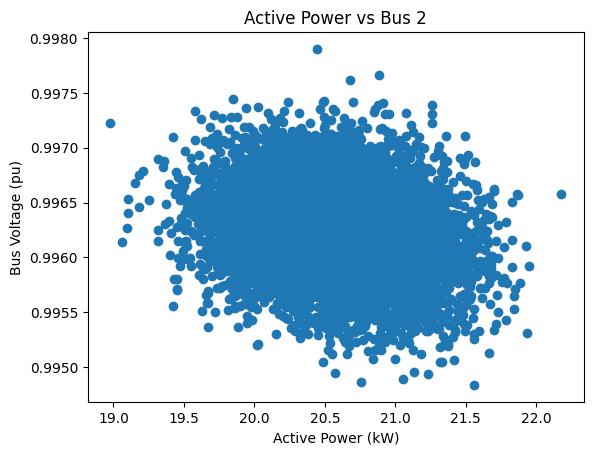

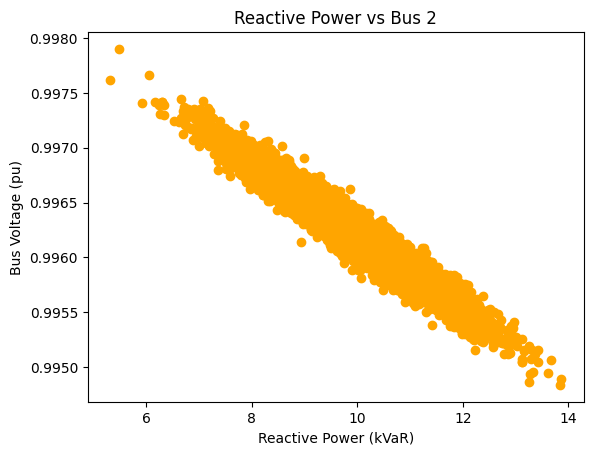

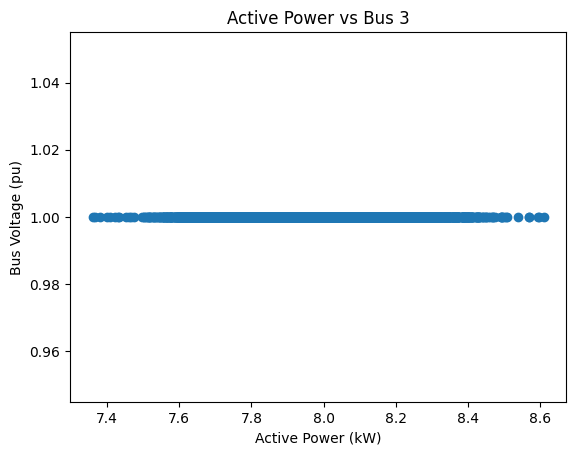

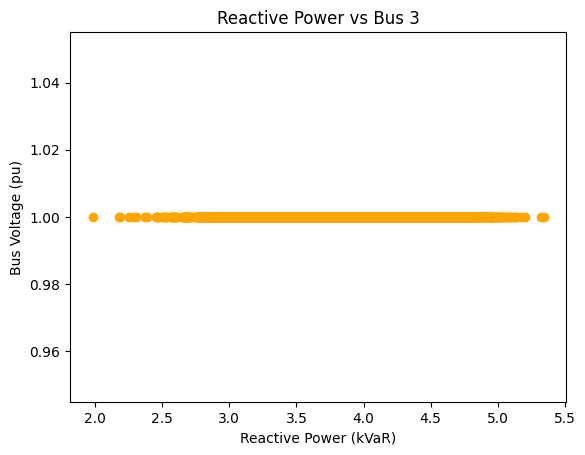

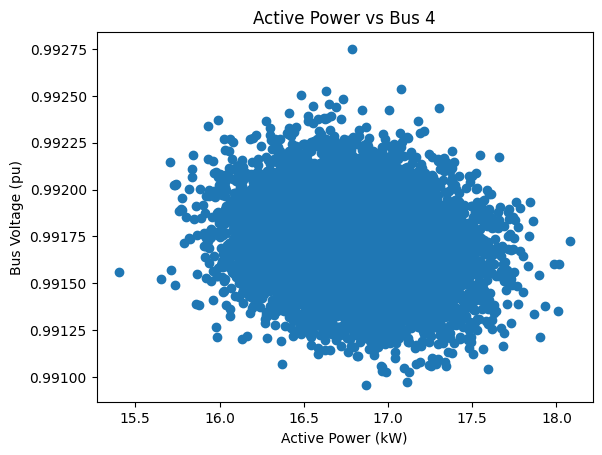

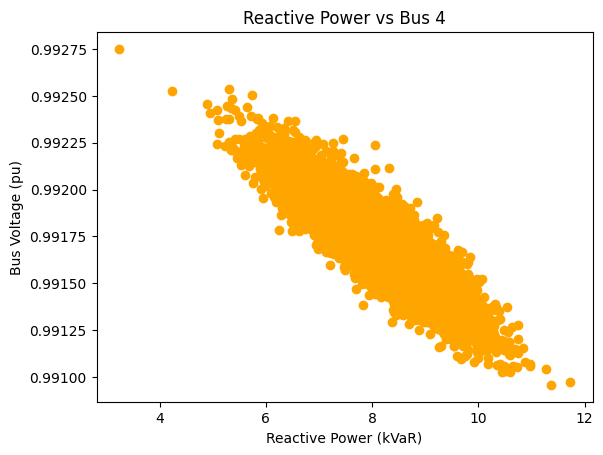

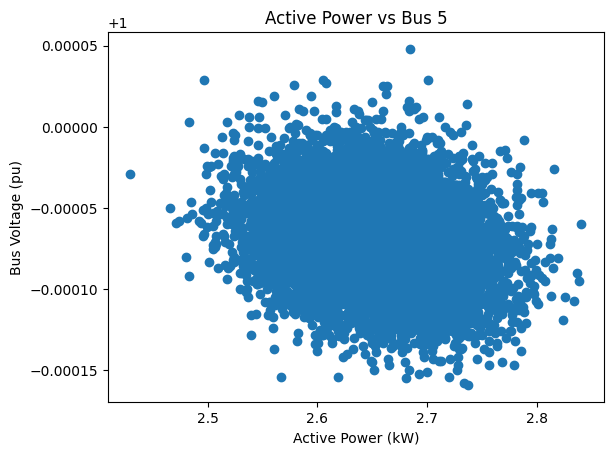

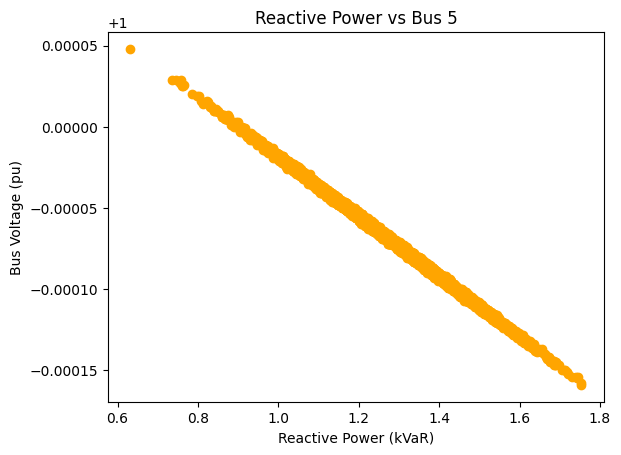

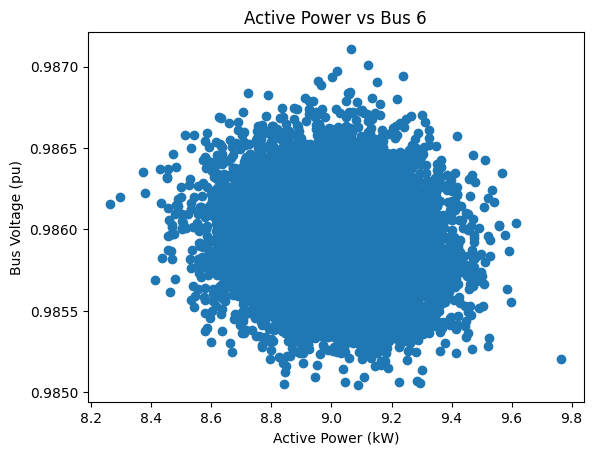

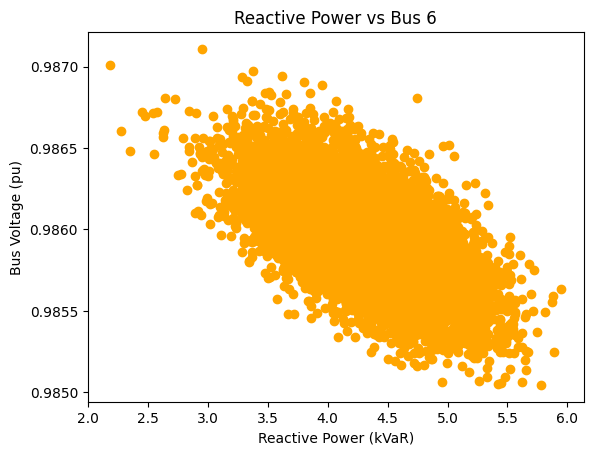

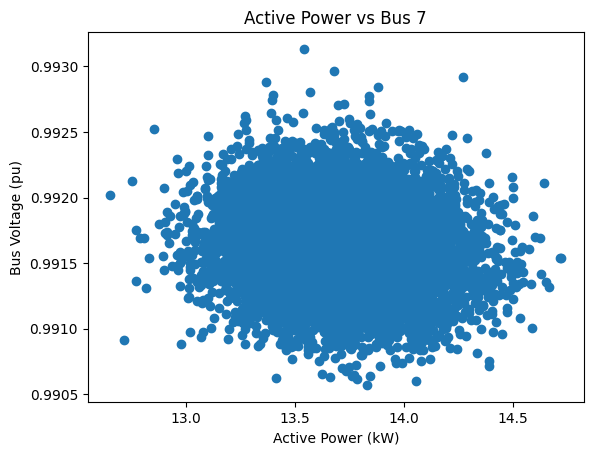

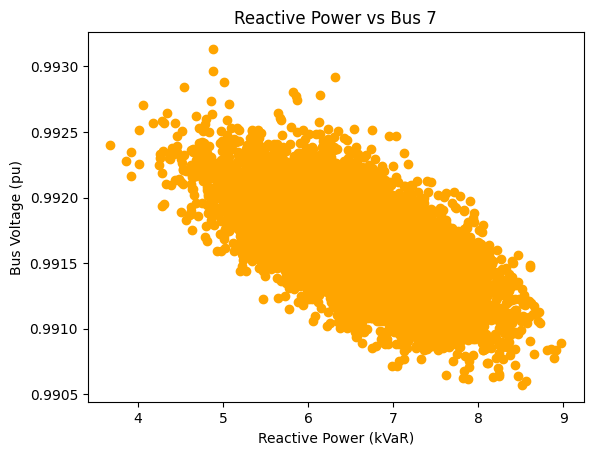

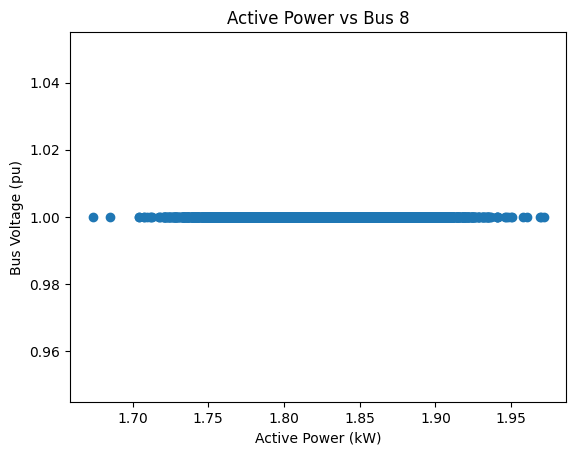

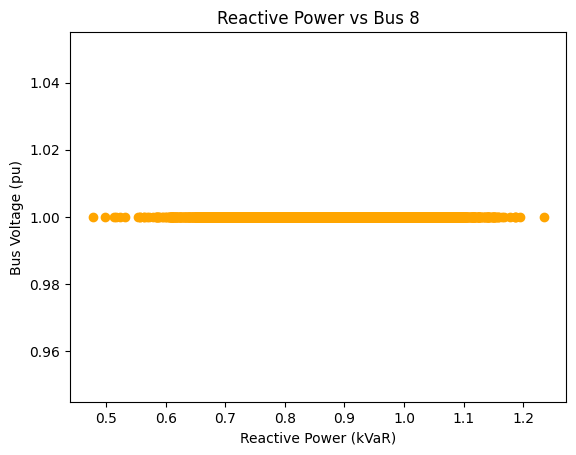

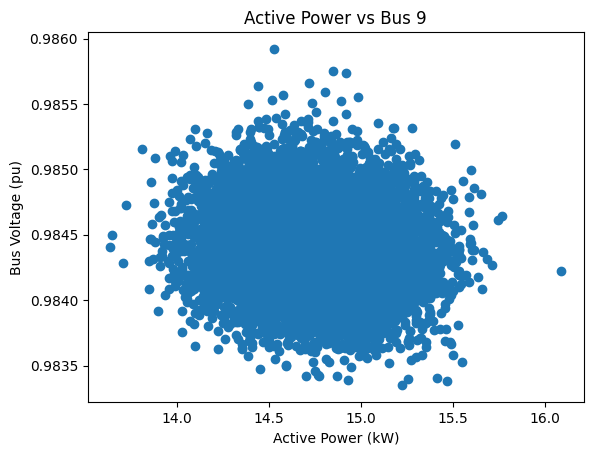

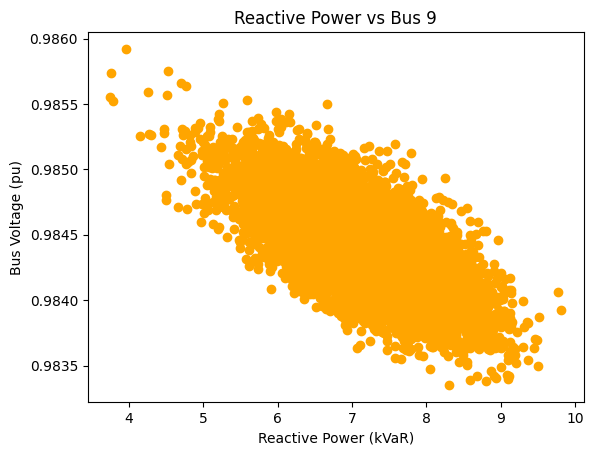

Evaluating Linear Regression...

Training Time: 0.14267 seconds
Training MSE: 0.00000
Training RMSE: 0.00003
Training MAPE: 0.00081%
Testing Time: 0.03190 seconds
Testing RMSE: 0.00003
Testing MAPE: 0.00083%

Actual Values:
[[1.0 0.996741 1.0 ... 0.991278 1.0 0.984046]
 [1.0 0.995544 1.0 ... 0.991228 1.0 0.984002]
 [1.0 0.996269 1.0 ... 0.992418 1.0 0.985207]
 ...
 [1.0 0.995914 1.0 ... 0.991379 1.0 0.984158]
 [1.0 0.996466 1.0 ... 0.991437 1.0 0.984232]
 [1.0 0.996082 1.0 ... 0.99221 1.0 0.984996]]
Predicted Values:
[[1.         0.99661987 1.         ... 0.99127832 1.         0.98404606]
 [1.         0.99560911 1.         ... 0.99122816 1.         0.98400227]
 [1.         0.99619522 1.         ... 0.99241858 1.         0.98520767]
 ...
 [1.         0.99579639 1.         ... 0.99137866 1.         0.98415813]
 [1.         0.99635256 1.         ... 0.99143649 1.         0.98423142]
 [1.         0.99625652 1.         ... 0.99221009 1.         0.98499633]]


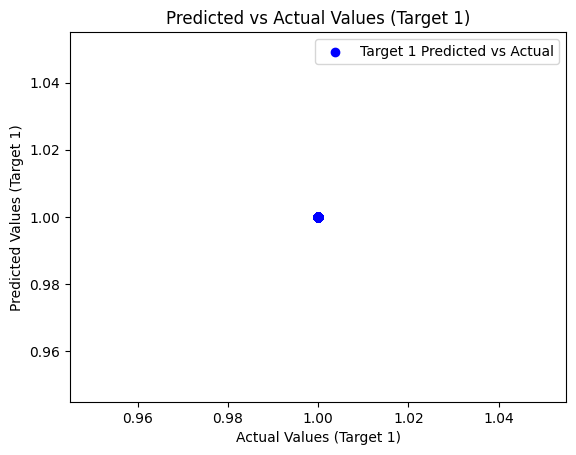

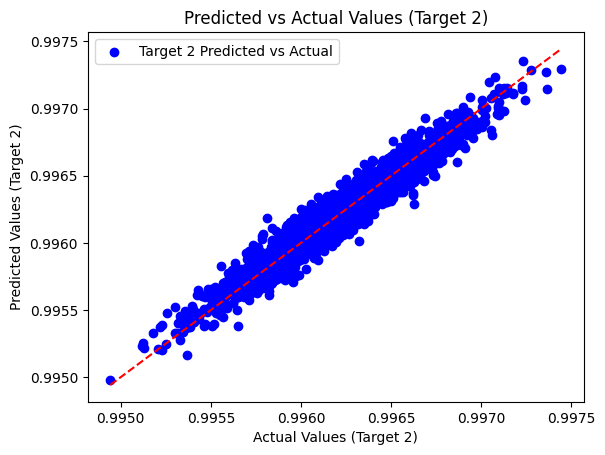

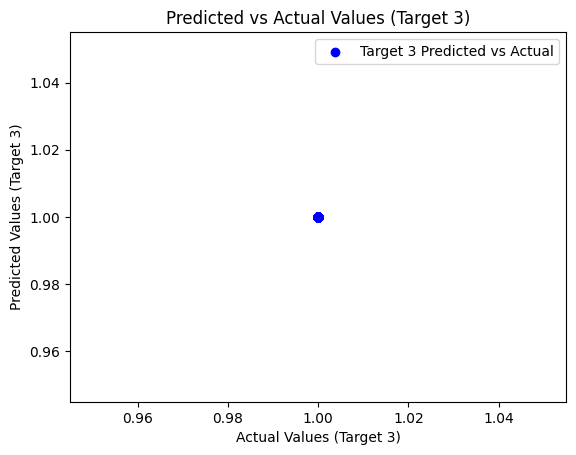

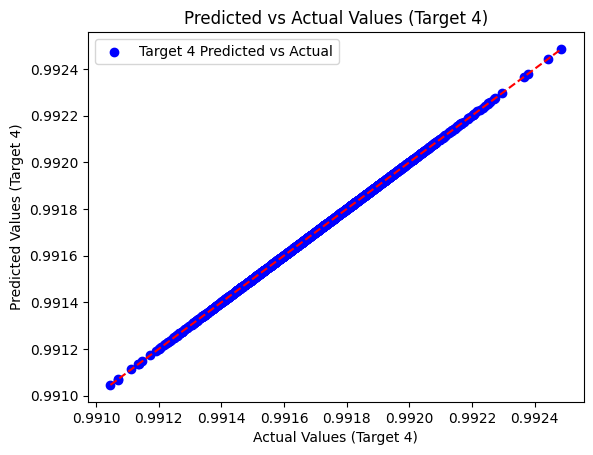

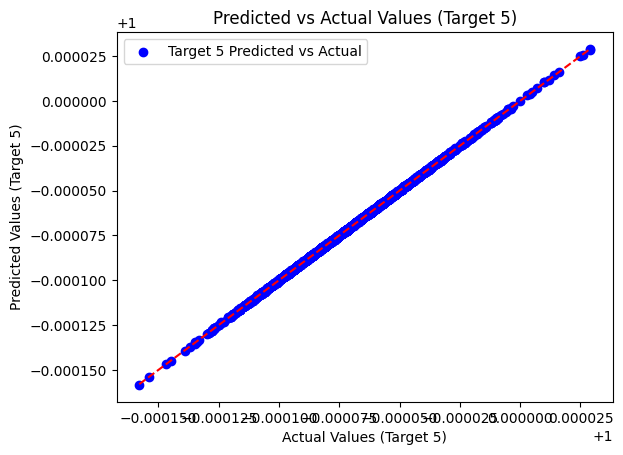

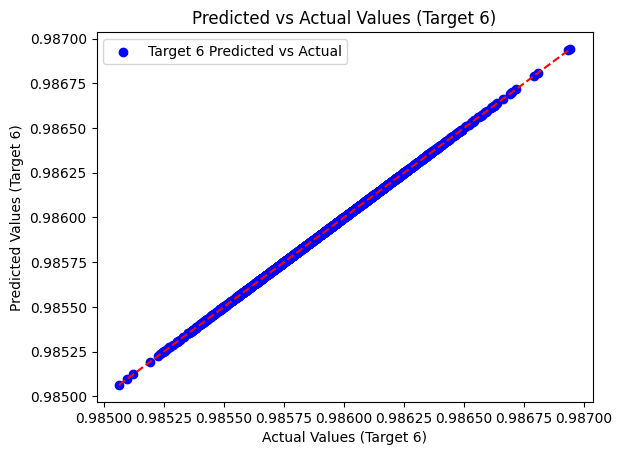

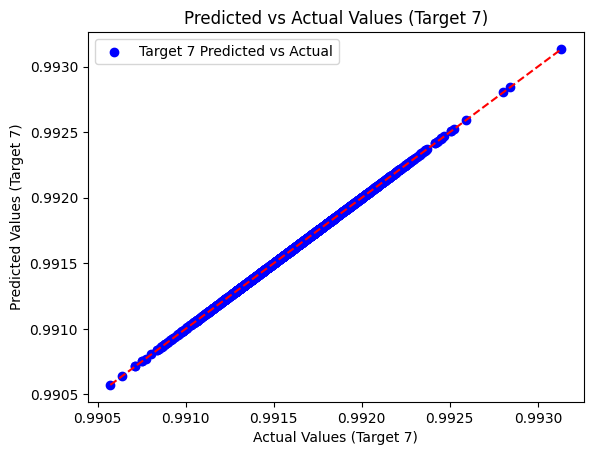

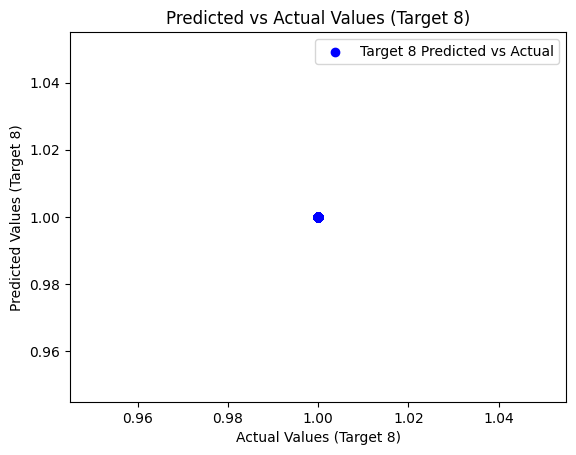

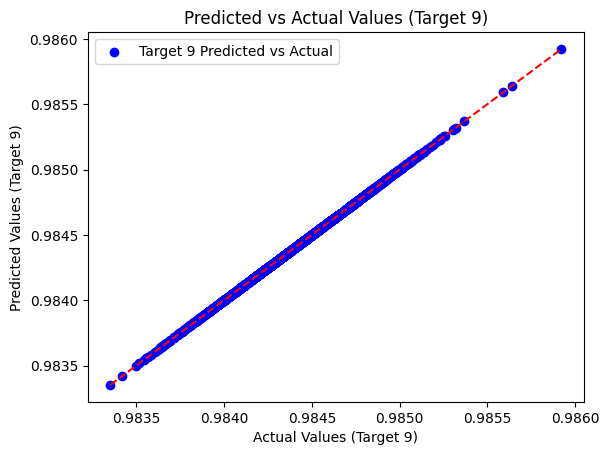

Evaluating SVR...

Training Time: 0.05540 seconds
Training MSE: 0.00000
Training RMSE: 0.00025
Training MAPE: 0.01539%
Testing Time: 0.00403 seconds
Testing RMSE: 0.00025
Testing MAPE: 0.01535%

Actual Values:
[[1.0 0.996741 1.0 ... 0.991278 1.0 0.984046]
 [1.0 0.995544 1.0 ... 0.991228 1.0 0.984002]
 [1.0 0.996269 1.0 ... 0.992418 1.0 0.985207]
 ...
 [1.0 0.995914 1.0 ... 0.991379 1.0 0.984158]
 [1.0 0.996466 1.0 ... 0.991437 1.0 0.984232]
 [1.0 0.996082 1.0 ... 0.99221 1.0 0.984996]]
Predicted Values:
[[1.        0.996369  1.        ... 0.991781  1.        0.9845685]
 [1.        0.996369  1.        ... 0.991781  1.        0.9845685]
 [1.        0.996369  1.        ... 0.991781  1.        0.9845685]
 ...
 [1.        0.996369  1.        ... 0.991781  1.        0.9845685]
 [1.        0.996369  1.        ... 0.991781  1.        0.9845685]
 [1.        0.996369  1.        ... 0.991781  1.        0.9845685]]


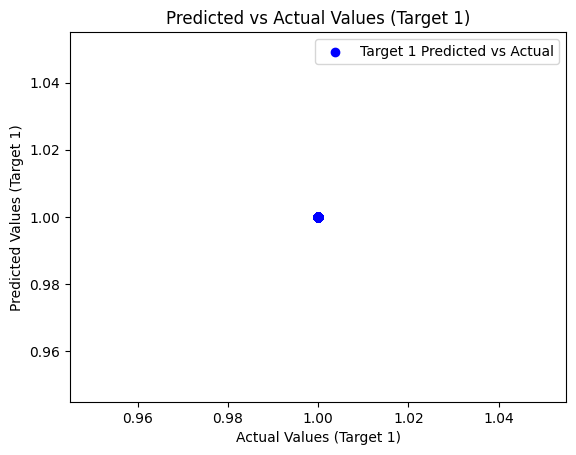

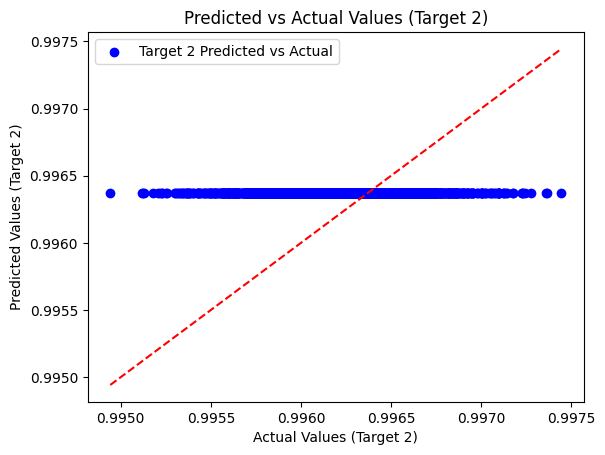

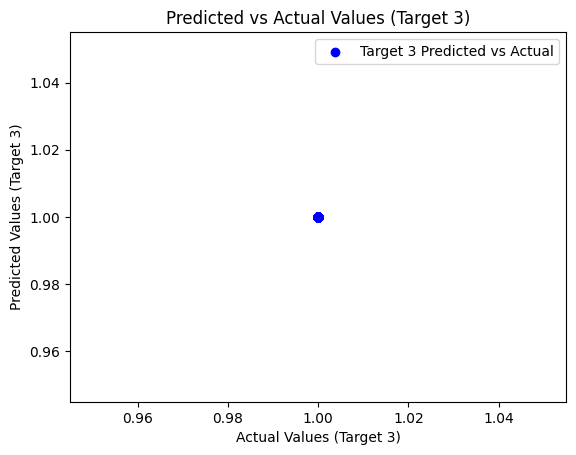

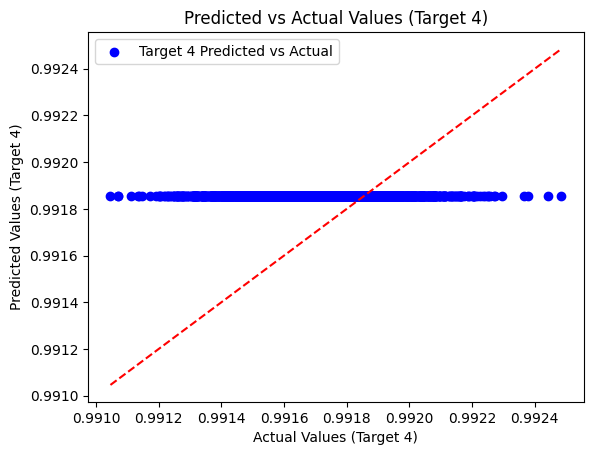

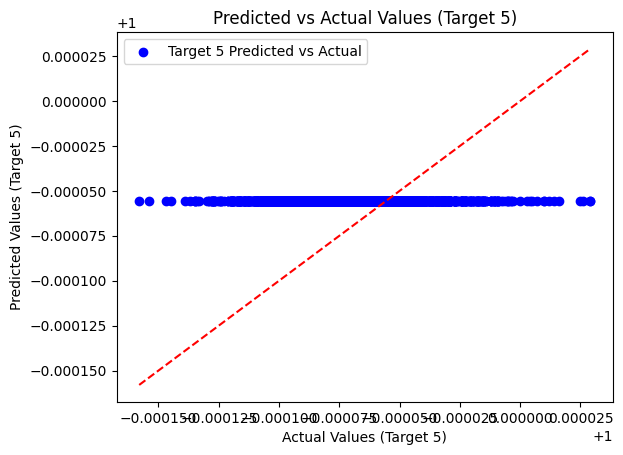

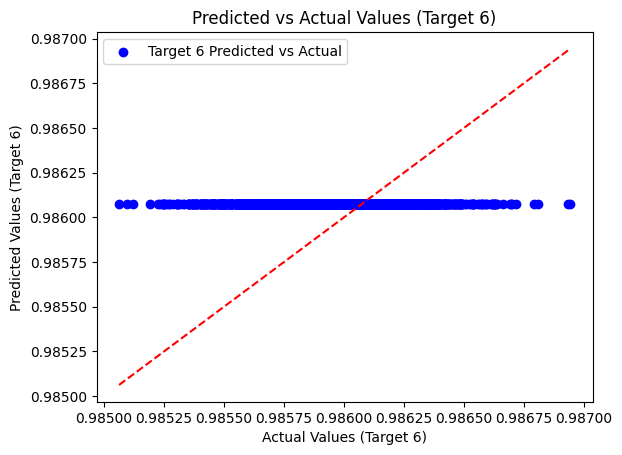

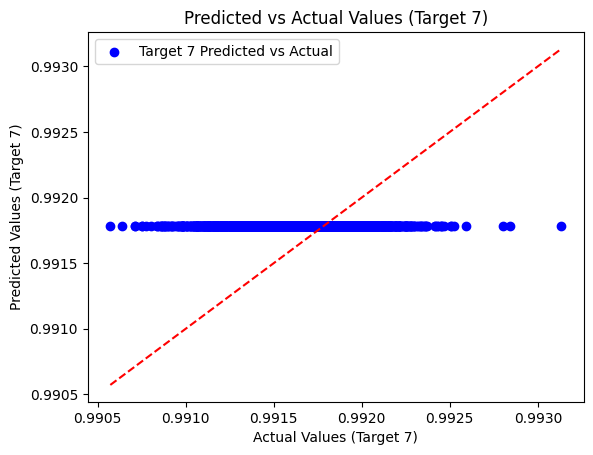

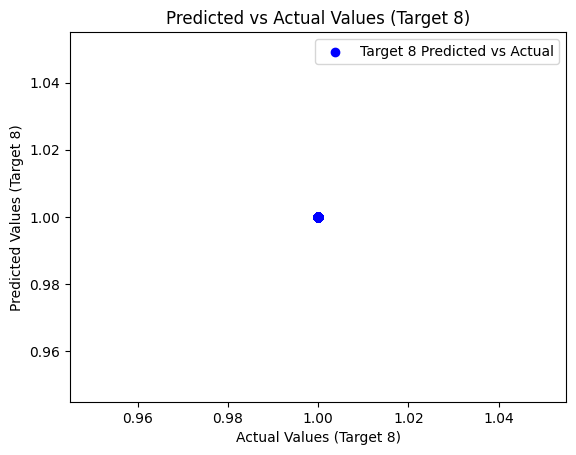

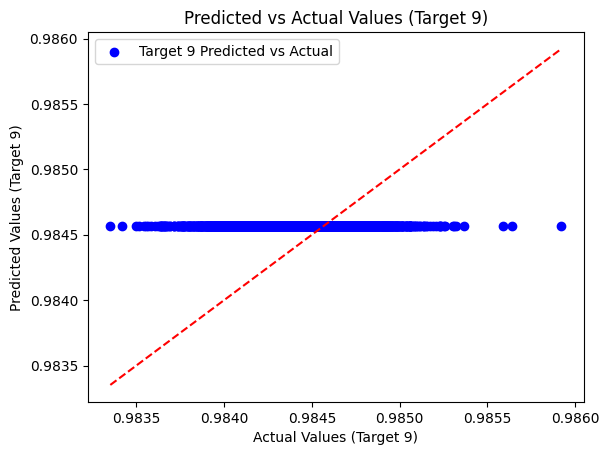

Evaluating Decision Tree...

Training Time: 1.79400 seconds
Training MSE: 0.00000
Training RMSE: 0.00000
Training MAPE: 0.00000%
Testing Time: 0.01038 seconds
Testing RMSE: 0.00007
Testing MAPE: 0.00385%

Actual Values:
[[1.0 0.996741 1.0 ... 0.991278 1.0 0.984046]
 [1.0 0.995544 1.0 ... 0.991228 1.0 0.984002]
 [1.0 0.996269 1.0 ... 0.992418 1.0 0.985207]
 ...
 [1.0 0.995914 1.0 ... 0.991379 1.0 0.984158]
 [1.0 0.996466 1.0 ... 0.991437 1.0 0.984232]
 [1.0 0.996082 1.0 ... 0.99221 1.0 0.984996]]
Predicted Values:
[[1.       0.996459 1.       ... 0.991317 1.       0.984057]
 [1.       0.995552 1.       ... 0.991271 1.       0.984059]
 [1.       0.996131 1.       ... 0.992286 1.       0.985064]
 ...
 [1.       0.995755 1.       ... 0.991399 1.       0.984056]
 [1.       0.996201 1.       ... 0.991446 1.       0.984294]
 [1.       0.996139 1.       ... 0.992167 1.       0.984918]]


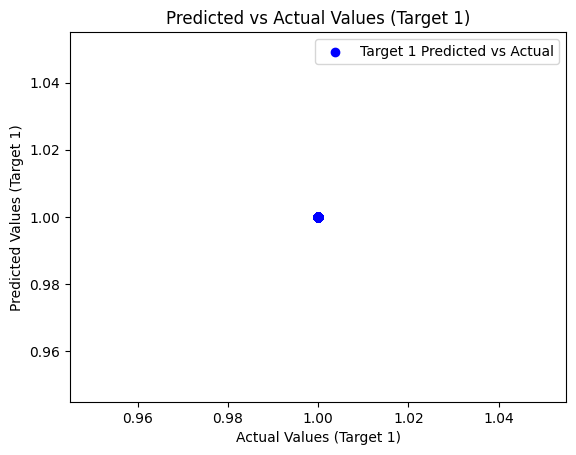

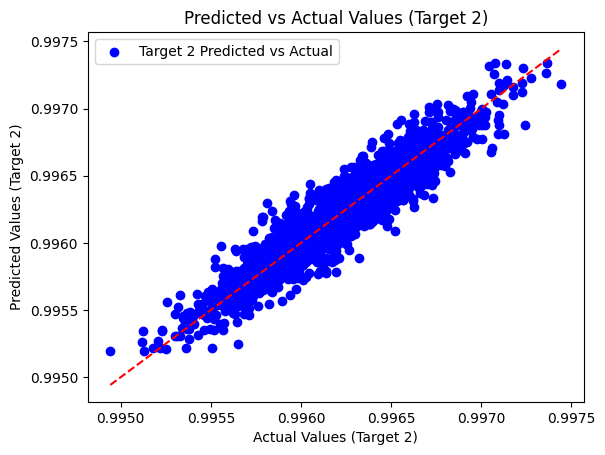

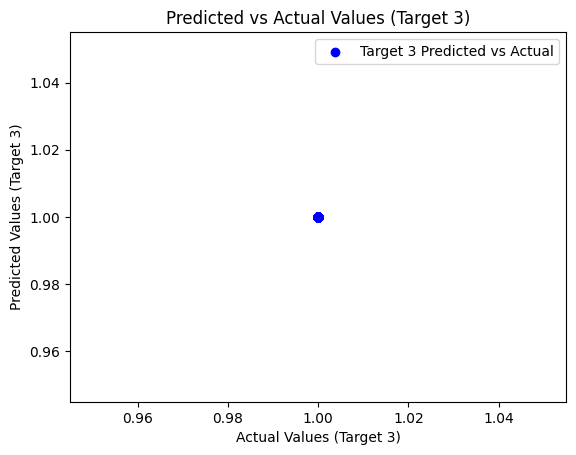

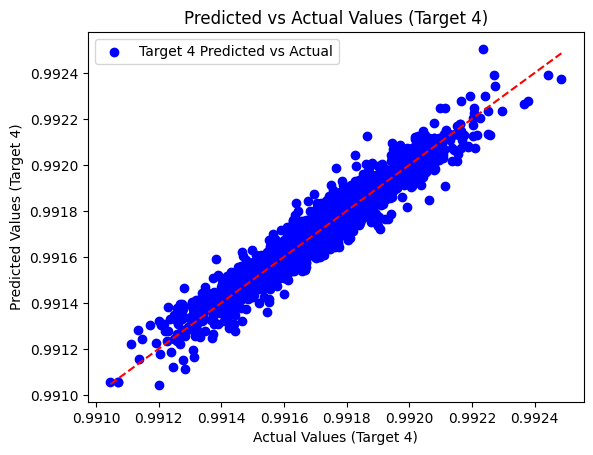

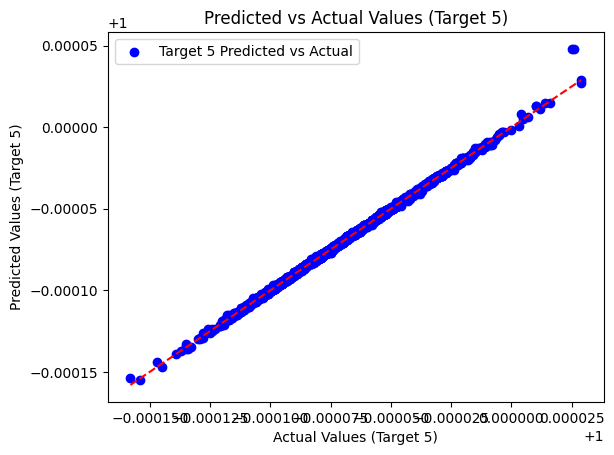

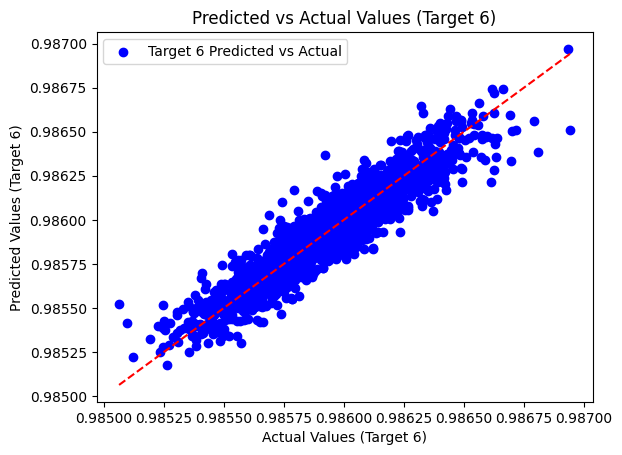

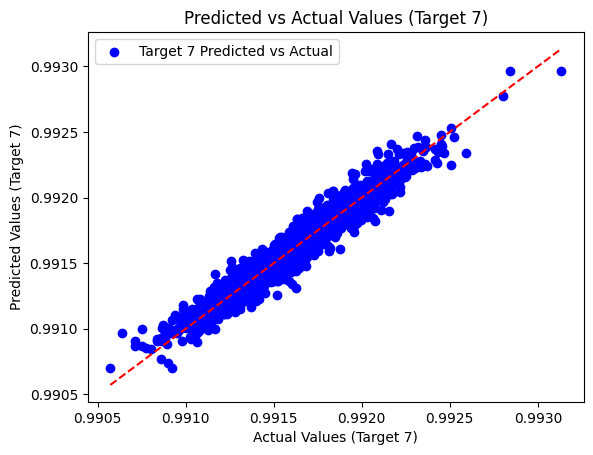

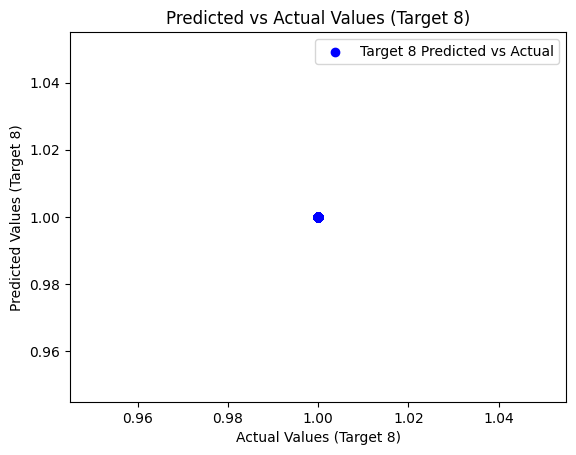

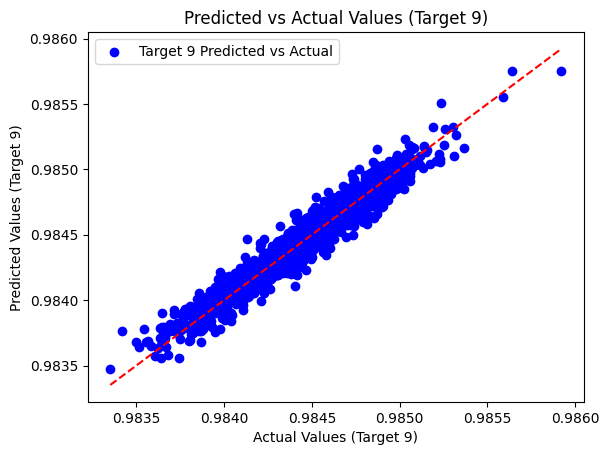

Evaluating ANN...

Training Time: 31.24232 seconds
Training MSE: 0.00256
Training RMSE: 0.05060
Training MAPE: 4.01489%
Testing Time: 0.03357 seconds
Testing RMSE: 0.06107
Testing MAPE: 4.80278%

Actual Values:
[[1.0 0.996741 1.0 ... 0.991278 1.0 0.984046]
 [1.0 0.995544 1.0 ... 0.991228 1.0 0.984002]
 [1.0 0.996269 1.0 ... 0.992418 1.0 0.985207]
 ...
 [1.0 0.995914 1.0 ... 0.991379 1.0 0.984158]
 [1.0 0.996466 1.0 ... 0.991437 1.0 0.984232]
 [1.0 0.996082 1.0 ... 0.99221 1.0 0.984996]]
Predicted Values:
[[1.20364153 1.04356258 0.96190022 ... 1.07315453 0.98755344 0.8686585 ]
 [1.14103506 1.24799399 0.93681079 ... 1.04284735 1.09052651 0.97722327]
 [1.02607239 1.01960847 0.95112325 ... 0.95663314 1.00927318 0.96856594]
 ...
 [0.99991155 1.02539221 1.01742207 ... 1.01119841 0.98628376 1.05318666]
 [0.96974148 0.95660148 0.83774087 ... 0.99040092 0.90071415 0.94992859]
 [0.95617365 0.97044121 0.92714796 ... 0.96286609 1.01055166 1.07612067]]


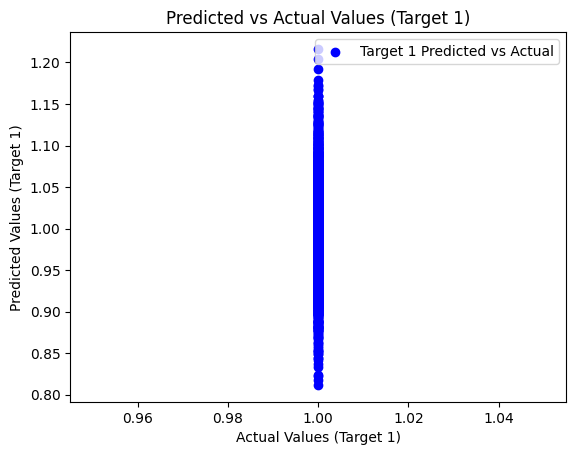

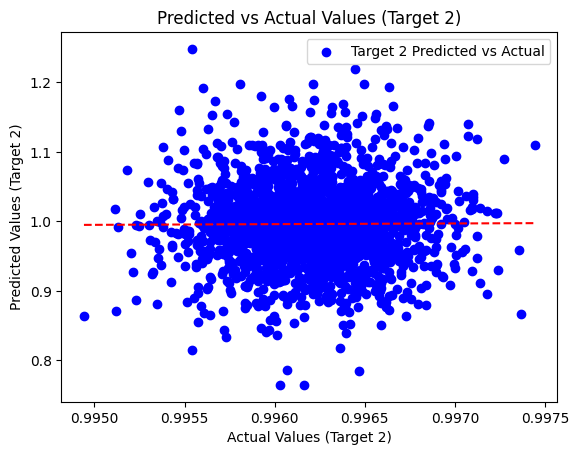

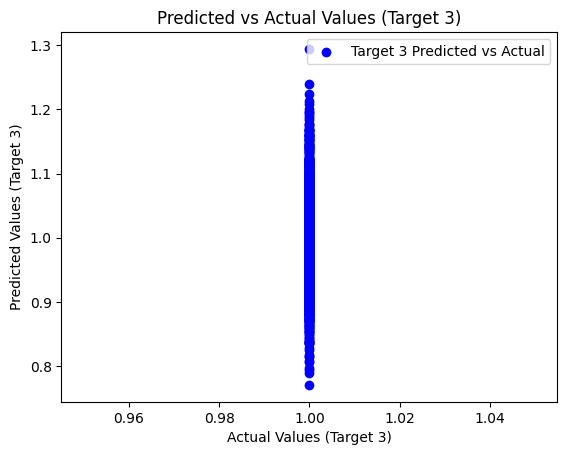

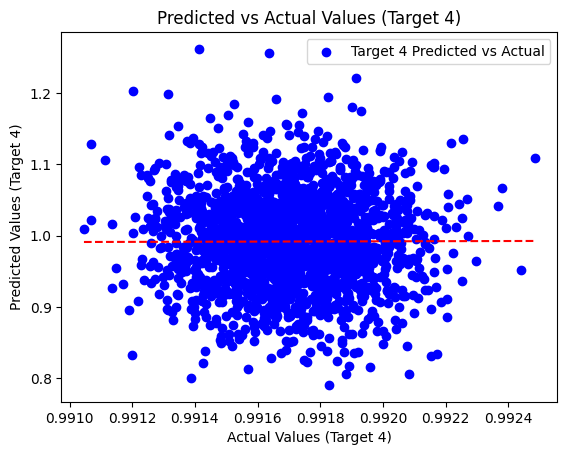

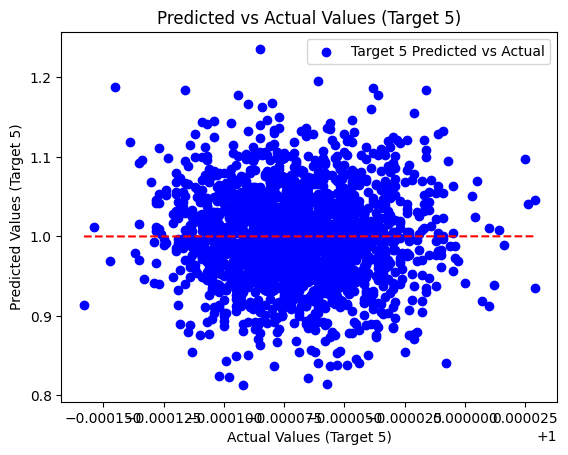

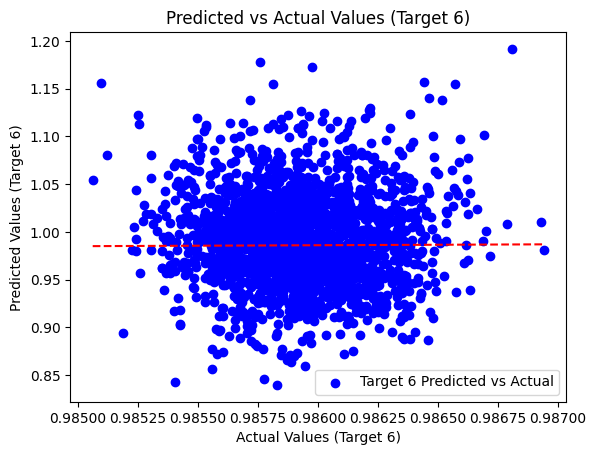

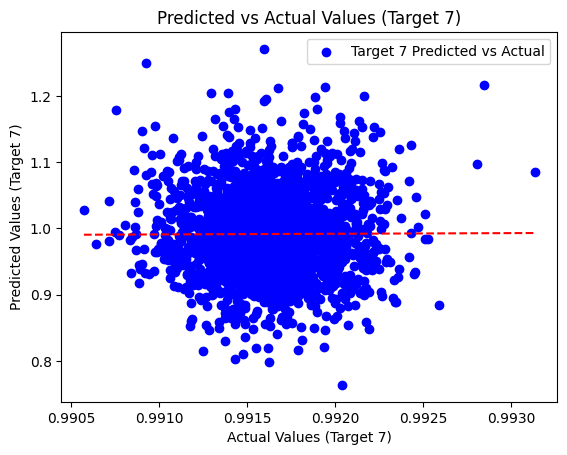

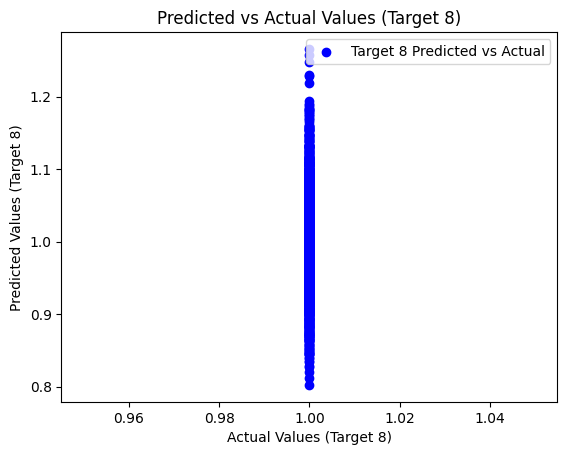

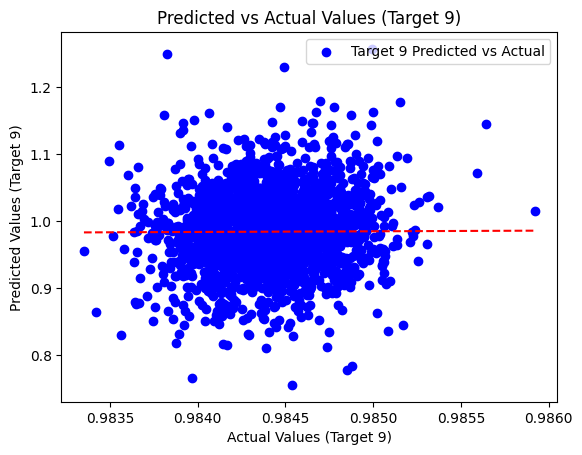

Evaluating Random Forest...



In [ ]:
df = pd.read_csv("https://github.com/ashishbhatta/Assignment-2/raw/refs/heads/main/Question%201/datas/data_for_ML_2.csv",header=1) #Input and target data

X,y = extract_input_output(df)
plot_input_output(X,y)
X_train, X_test, y_train, y_test = extract_test_train(inputs = X,outputs = y,testsize = 0.2)

#print(X.size)
#print(y.size)
#print(X_train.size)
#print(y_train.size)
#print(X_test.size)
#print(y_test.size)


X_train_scaled, X_test_scaled = normalize_inputs(X_train,X_test)


models = {
    'Linear Regression':MultiOutputRegressor(LinearRegression()),
    'SVR': MultiOutputRegressor(SVR()),
    'Decision Tree': MultiOutputRegressor(DecisionTreeRegressor(random_state=12345)),
    'ANN': MultiOutputRegressor(MLPRegressor()),
    'Random Forest': MultiOutputRegressor(RandomForestRegressor()),
    'Xtreme Gradient Boost': MultiOutputRegressor(XGBRegressor())
        }


for name, model in models.items():
    print(f"Evaluating {name}...\n")
    evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)


## Hyper Parameter Tuning for Decision Tree

In [ ]:
# Create a tuning grid of different hyperparameter values
param_grid = {
    'min_samples_leaf': [25, 50, 75, 100, 200, 300],
    'min_impurity_decrease': [0.0, 0.001, 0.005, 0.01, 0.015, 0.02]
}

# Instantiate a regressor
regressor = DecisionTreeRegressor(random_state=12345)

# Instantiate 10-fold CV repeated 10 times
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=54321)

# Instantiate grid search CV
grid_cv = GridSearchCV(regressor, param_grid, scoring='neg_mean_squared_error', n_jobs=5, cv=cv, refit=True)

# Perform grid search
grid_cv.fit(X_train_scaled, y_train)

# Which parameters were the best?
print(grid_cv.best_params_)
